In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing
pd.set_option('display.max_columns', None)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [73]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [74]:
data = pd.read_csv('startup data.csv')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [76]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [77]:
data = data.drop(['Unnamed: 0','Unnamed: 6','latitude','longitude','zip_code','id','name','object_id'], axis = 1)

### Procesimi i te dhenave

#### State Code Variable

1. **Kontrollojm nese state_code dhe state_code.1 mban te njejtat variabla per cdo rrjehst** - Nje rrjesht nuk eshte i njejt me tjetrin sepse ne state_code.1 mungojn te dhena. Prandoj hamendosjm se kolona e sakt eshte state_code (duke konsideruar kolonen e qytetit). 
2. **Reduktojm numrin e kategorive** - 5 kategorite me kryesore te state_code mbulojne me shume se 80% te te dhenave prandaj kategorite e tjera do ti konsiderojm si 'other'. 

In [78]:
print(data['state_code'].equals(data['state_code.1']))

False


In [79]:
df = data.loc[data['state_code'] != data['state_code.1']]
df.style.set_properties(**{'background-color': 'yellow'}, subset=['state_code','state_code.1'])

,state_code,city,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
515,CA,Menlo Park,0,1/1/2005,9/1/2010,3/1/2007,4/15/2008,2.161600,3.287700,3.498600,7.690400,13,2,33000000,4,nan,0,0,0,0,0,search,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,2.500000,1,closed


In [80]:
state = data['state_code'].value_counts().to_frame()
state['proportion'] = state['state_code']/sum(state['state_code'])*100
state

,state_code,proportion
CA,488,52.871073
NY,106,11.484290
MA,83,8.992416
TX,42,4.550379
WA,42,4.550379
CO,19,2.058505
IL,18,1.950163
PA,17,1.841820
VA,13,1.408451
GA,11,1.191766


In [81]:
data['State'] = 'other'
data.loc[(data['state_code'] == 'CA'), 'State'] = 'CA'
data.loc[(data['state_code'] == 'NY'), 'State'] = 'NY'
data.loc[(data['state_code'] == 'MA'), 'State'] = 'MA'
data.loc[(data['state_code'] == 'TX'), 'State'] = 'TX'
data.loc[(data['state_code'] == 'WA'), 'State'] = 'WA'

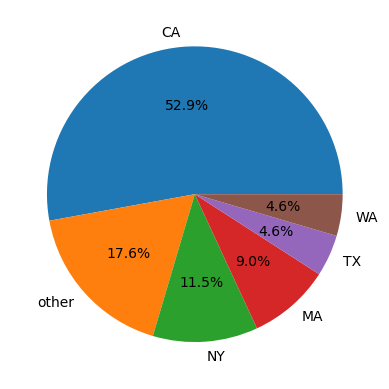

In [82]:
state_count = data['State'].value_counts()
plt.pie(state_count, labels = state_count.index, autopct = '%1.1f%%')
plt.show()

In [83]:
data = data.drop(['state_code','state_code.1','is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate'],axis =1)

#### Category code variable

In [84]:
category = data['category_code'].value_counts().to_frame()
category['proportion'] = category['category_code']/sum(category['category_code'])*100
category

,category_code,proportion
software,153,16.576381
web,144,15.601300
mobile,79,8.559047
enterprise,73,7.908992
advertising,62,6.717226
games_video,52,5.633803
semiconductor,35,3.791983
network_hosting,34,3.683640
biotech,34,3.683640
hardware,27,2.925244


In [85]:
data['category'] = 'other'
data.loc[(data['category_code'] == 'software'), 'category'] = 'software'
data.loc[(data['category_code'] == 'web'), 'category'] = 'web'
data.loc[(data['category_code'] == 'mobile'), 'category'] = 'mobile'
data.loc[(data['category_code'] == 'enterprise'), 'category'] = 'enterprise'
data.loc[(data['category_code'] == 'advertising'), 'category'] = 'advertising'
data.loc[(data['category_code'] == 'games_video'), 'category'] = 'games_video'
data.loc[(data['category_code'] == 'semiconductor'), 'category'] = 'semiconductor'
data.loc[(data['category_code'] == 'network_hosting'), 'category'] = 'network_hosting'
data.loc[(data['category_code'] == 'biotech'), 'category'] = 'biotech'
data.loc[(data['category_code'] == 'hardware'), 'category'] = 'hardware'

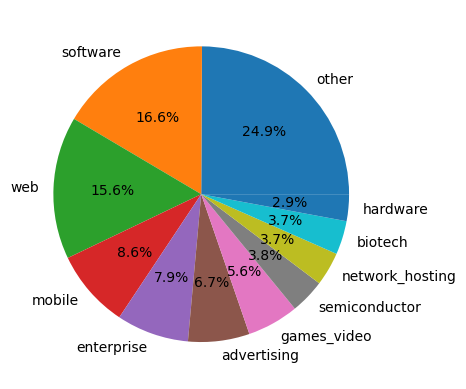

In [86]:
category_count = data['category'].value_counts()
plt.pie(category_count, labels = category_count.index, autopct = '%1.1f%%')
plt.show()

In [87]:
data = data.drop(['category_code','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory'],axis = 1)

#### Labels and Status Variables

1. **Kontrollojm nese labels dhe status variables mbajne te njejtin informacion per cdo rrjesht.** 

In [88]:
data['status'] = np.where(data['status']=='acquired',1,0)

In [89]:
print(data['labels'].equals(data['status']))

True


In [90]:
data = data.drop(['labels'], axis = 1)

In [91]:
prop_df = data.groupby('status').size().reset_index(name = 'counts')
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()

Text(0.5, 1.0, 'Distribution of Status of the Startup')

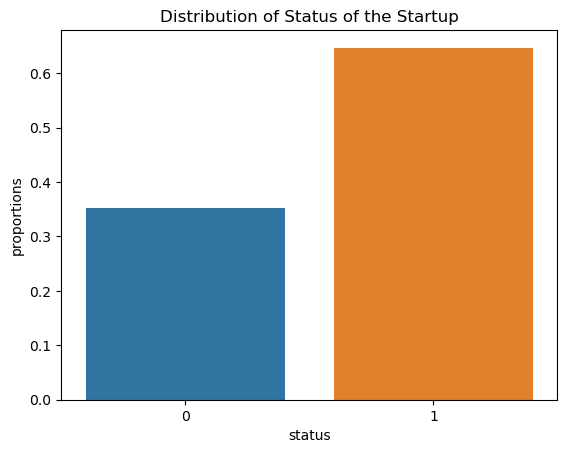

In [92]:
sns.barplot(data = prop_df, x = 'status', y = 'proportions')
plt.title('Distribution of Status of the Startup')

#### Founded_at dhe Closed_at Variable

1. **Ndryshojm kolonen Founded_at ne nje kolon te re te quajtur Founded_year**
2. **Kontroolojm mungesen e variablave ne closed_at** - Kjo ndodh sepse statusi i startup eshte 'i sigurt' q edo te thote se nuk eshte mbyllur. Por disa statrup te tille kane nje date te mbylljes. Keshtu qe keta rjresht jane hequr nga te dhenat.

In [93]:
data['founded_at'] = data['founded_at'].apply(pd.to_datetime)
data['founded_year'] = data['founded_at'].dt.strftime('%Y')

In [94]:
data['closed_at'] = data['closed_at'].fillna(0)
data['closed_at'] = data['closed_at'].apply(str)

In [95]:
closed = []
for index, row in data.iterrows():
    if ((row['closed_at'] != '0') and (row['status'] == 1)) == True:
        closed.append(True)

In [96]:
closed.count(True)

9

In [97]:
df = data.loc[(data['closed_at']!='0') & (data['status'] == 1)]
df.style.set_properties(**{'background-color': 'yellow'}, subset=['closed_at','status'])

,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year
73,San Francisco,2003-01-01 00:00:00,2/1/2001,9/1/2004,5/1/2012,1.668500,9.337000,7.380800,10.474000,17,4,40400000,3,0,0,1,1,1,1,1.666700,1,1,CA,advertising,2003
104,San Francisco,2007-07-01 00:00:00,9/1/2011,1/1/2007,10/1/2008,-0.495900,1.254800,2.172600,4.600000,21,2,6000000,2,0,1,1,0,0,0,4.000000,1,1,CA,web,2007
291,Columbia,2000-01-01 00:00:00,10/15/2009,4/24/2007,4/24/2007,7.315100,7.315100,5.005500,5.005500,6,1,16980999,1,0,0,0,1,0,0,1.000000,1,1,other,biotech,2000
342,Austin,2003-01-01 00:00:00,6/1/2013,6/14/2007,3/23/2010,4.452100,7.227400,7.005500,7.005500,5,2,5992316,1,1,0,1,0,0,0,2.000000,0,1,TX,enterprise,2003
381,Redwood City,2006-03-01 00:00:00,1/1/2012,6/1/2007,1/14/2008,1.252100,1.874000,4.717800,5.095900,13,3,2600000,2,0,1,1,0,0,0,3.666700,1,1,CA,network_hosting,2006
445,Cambridge,2006-01-01 00:00:00,1/1/2008,1/3/2008,1/3/2008,2.005500,2.005500,0.000000,0.000000,1,1,30000000,1,1,0,0,0,0,0,2.000000,1,1,MA,other,2006
473,Burlingame,2007-01-01 00:00:00,12/1/2011,8/1/2007,7/6/2009,0.580800,2.512300,0.591800,4.969900,9,3,1415000,4,1,1,0,0,0,0,1.000000,1,1,CA,other,2007
560,San Francisco,2006-10-01 00:00:00,11/16/2010,12/1/2007,12/1/2007,1.167100,1.167100,1.926000,4.013700,19,1,3000000,4,0,0,1,0,0,0,2.000000,1,1,CA,advertising,2006
756,Mountain View,2004-12-06 00:00:00,5/19/2011,4/4/2006,8/22/2007,1.326000,2.709600,4.369900,6.463000,6,2,29000000,3,0,0,0,1,1,0,2.500000,1,1,CA,software,2004


In [98]:
data = data.drop(df.index.tolist()).reset_index().drop(['index'],axis = 1)

In [99]:
data = data.drop(['founded_at','closed_at'], axis = 1)

In [100]:
prop_df = data.groupby('founded_year').size().reset_index(name = 'counts')
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()

Text(0.5, 1.0, 'Distribution of number of startups with year (acuired/not)')

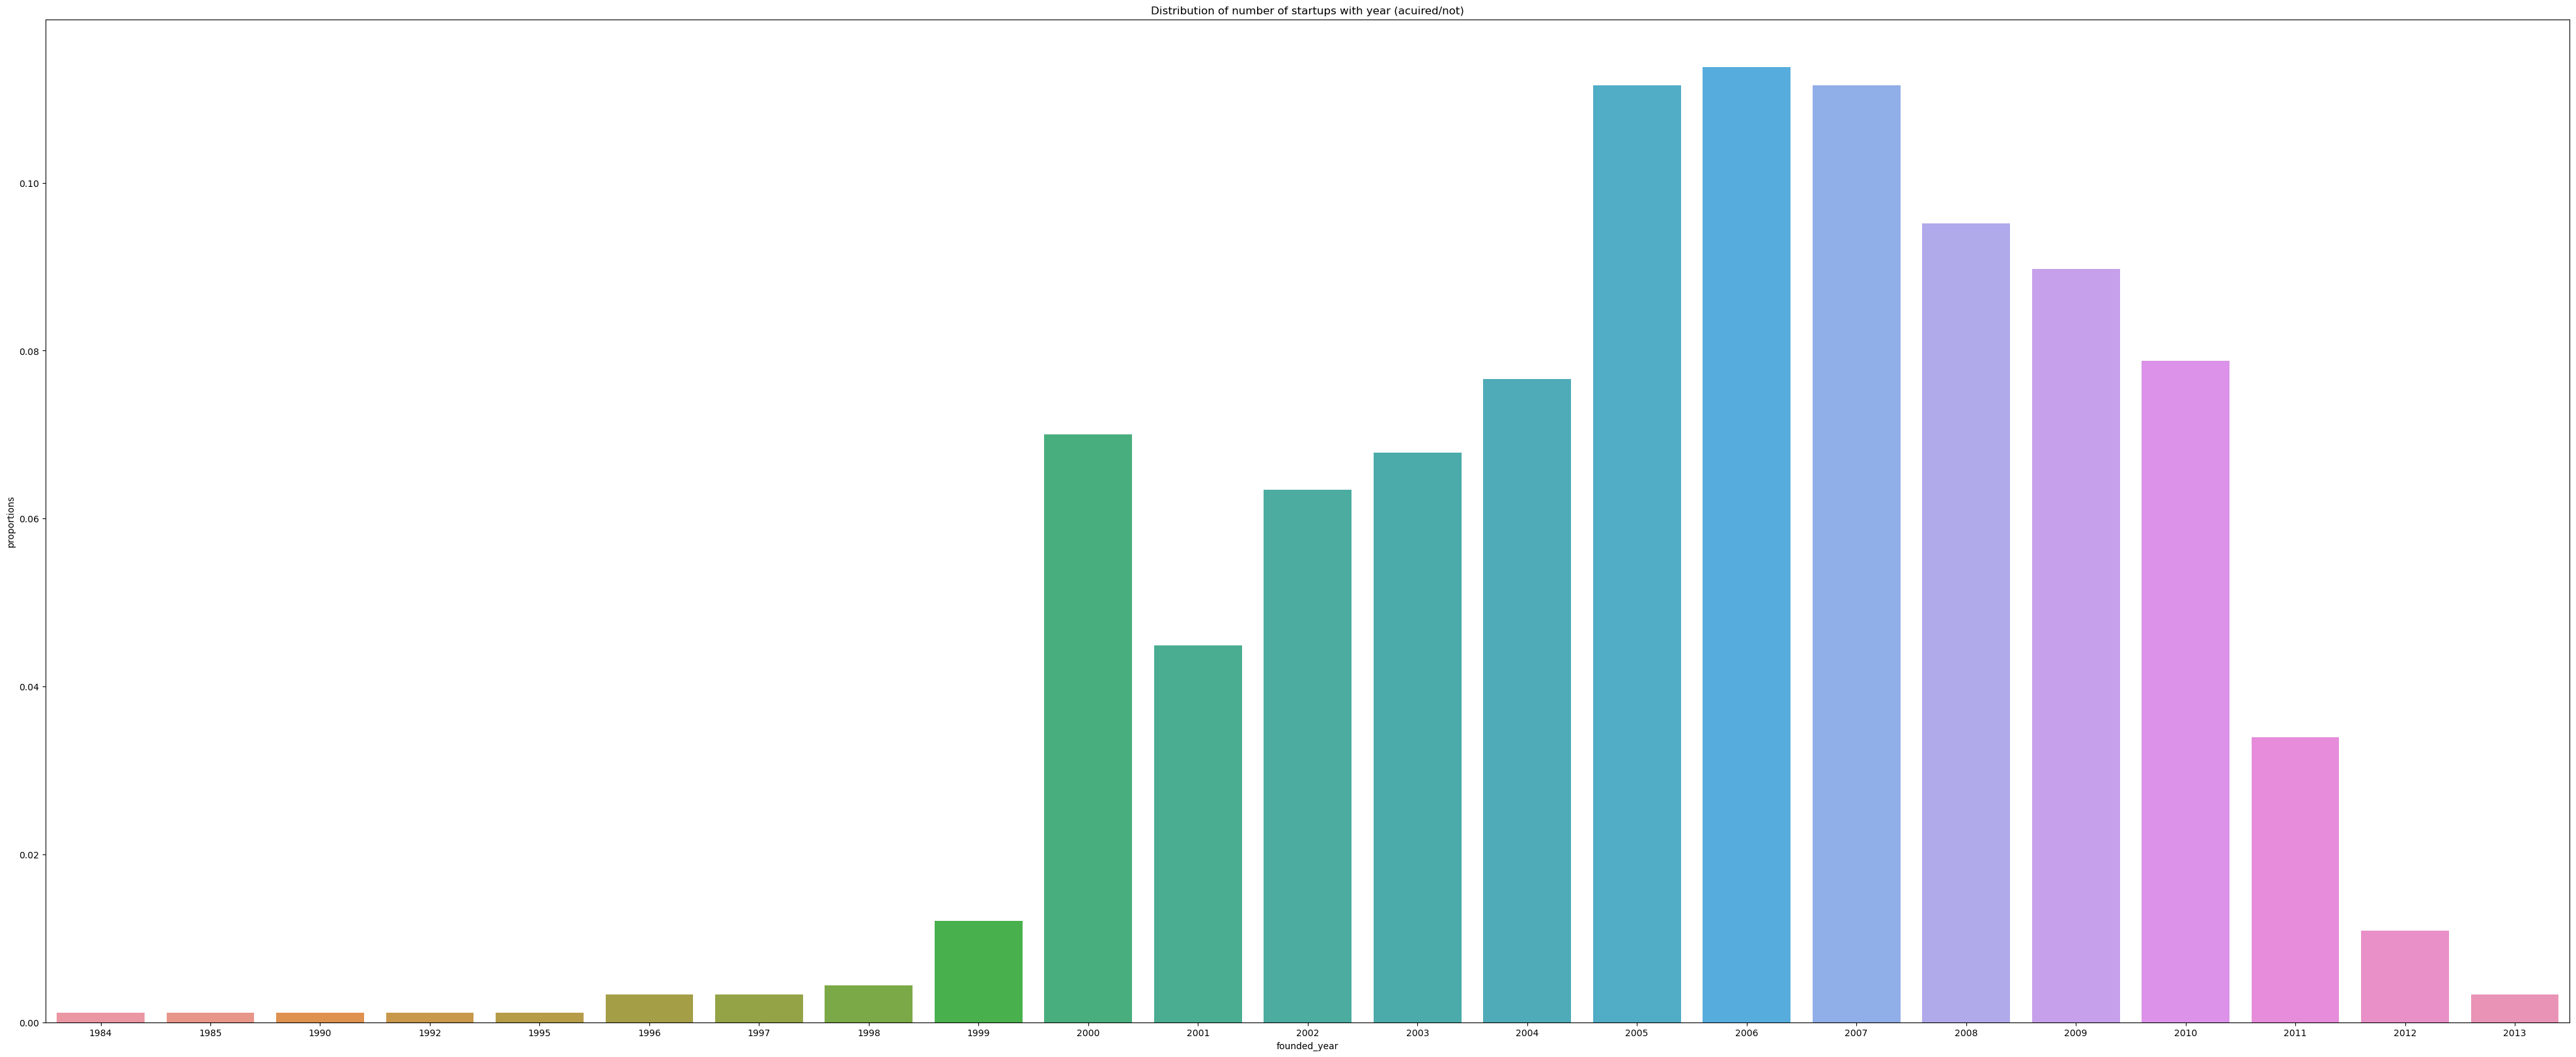

In [101]:
fig, ax = plt.subplots(figsize = (50,20))
sns.barplot(data = prop_df, x = 'founded_year', y = 'proportions')
plt.title('Distribution of number of startups with year (acuired/not)')

#### first_funding_at and last_funding_at variables

In [102]:
data = data.drop(['first_funding_at','last_funding_at'],axis=1)

#### Change the data types

In [103]:
data['has_VC'] = data['has_VC'].apply(str)
data['has_angel'] = data['has_angel'].apply(str)
data['has_roundA'] = data['has_roundA'].apply(str)
data['has_roundB'] = data['has_roundB'].apply(str)
data['has_roundC'] = data['has_roundC'].apply(str)
data['has_roundD'] = data['has_roundD'].apply(str)
data['is_top500'] = data['is_top500'].apply(str)
data['status'] = data['status'].apply(str)

#### Handling Invalid values in Age first and last funding year, Age first and last milestone year

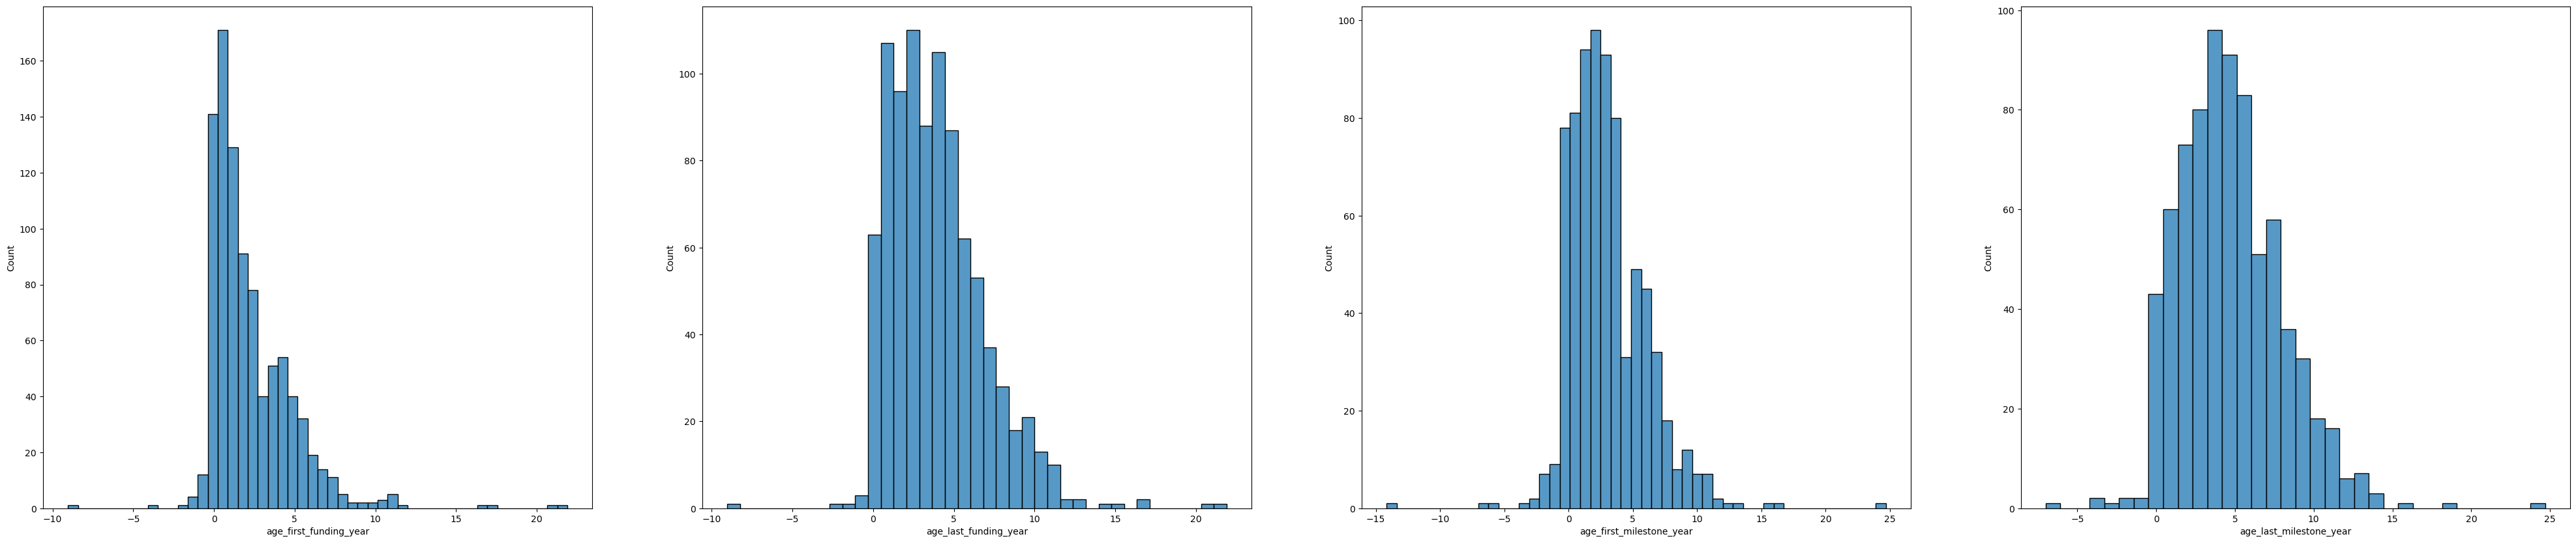

In [104]:
var = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year']

fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (50,10))

for k, ax in zip(range(4), axes.flatten()):
    sns.histplot(data = data, x = f'{var[k]}', ax = ax)

In [105]:
data['age_first_funding_year'] = np.where(data['age_first_funding_year']<0,0,data['age_first_funding_year'])
data['age_last_funding_year'] = np.where(data['age_last_funding_year']<0,0,data['age_last_funding_year'])
data['age_first_milestone_year'] = np.where(data['age_first_milestone_year']<0,0,data['age_first_milestone_year'])
data['age_last_milestone_year'] = np.where(data['age_last_milestone_year']<0,0,data['age_last_milestone_year'])

#### Handling missing values

<Axes: xlabel='age_first_milestone_year', ylabel='Count'>

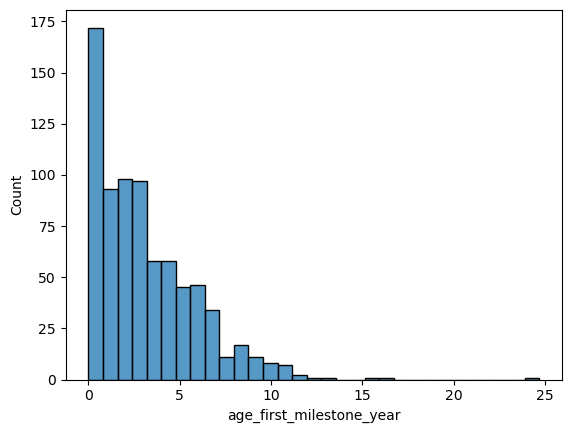

In [106]:
sns.histplot(data = data, x = 'age_first_milestone_year')

<Axes: xlabel='age_last_milestone_year', ylabel='Count'>

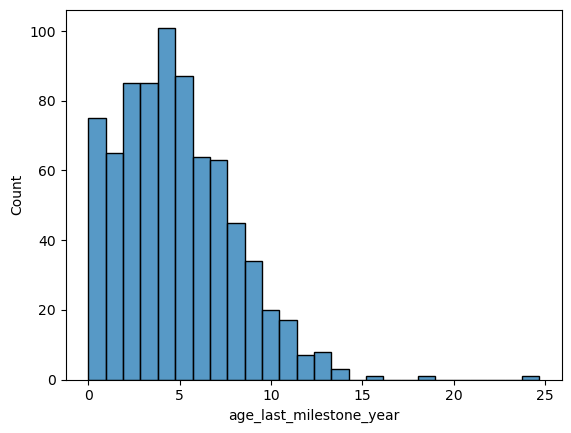

In [107]:
sns.histplot(data = data, x = 'age_last_milestone_year')

In [108]:
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(data['age_first_milestone_year'].mode()[0])
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(data['age_last_milestone_year'].mode()[0])

#### Handling Outliers

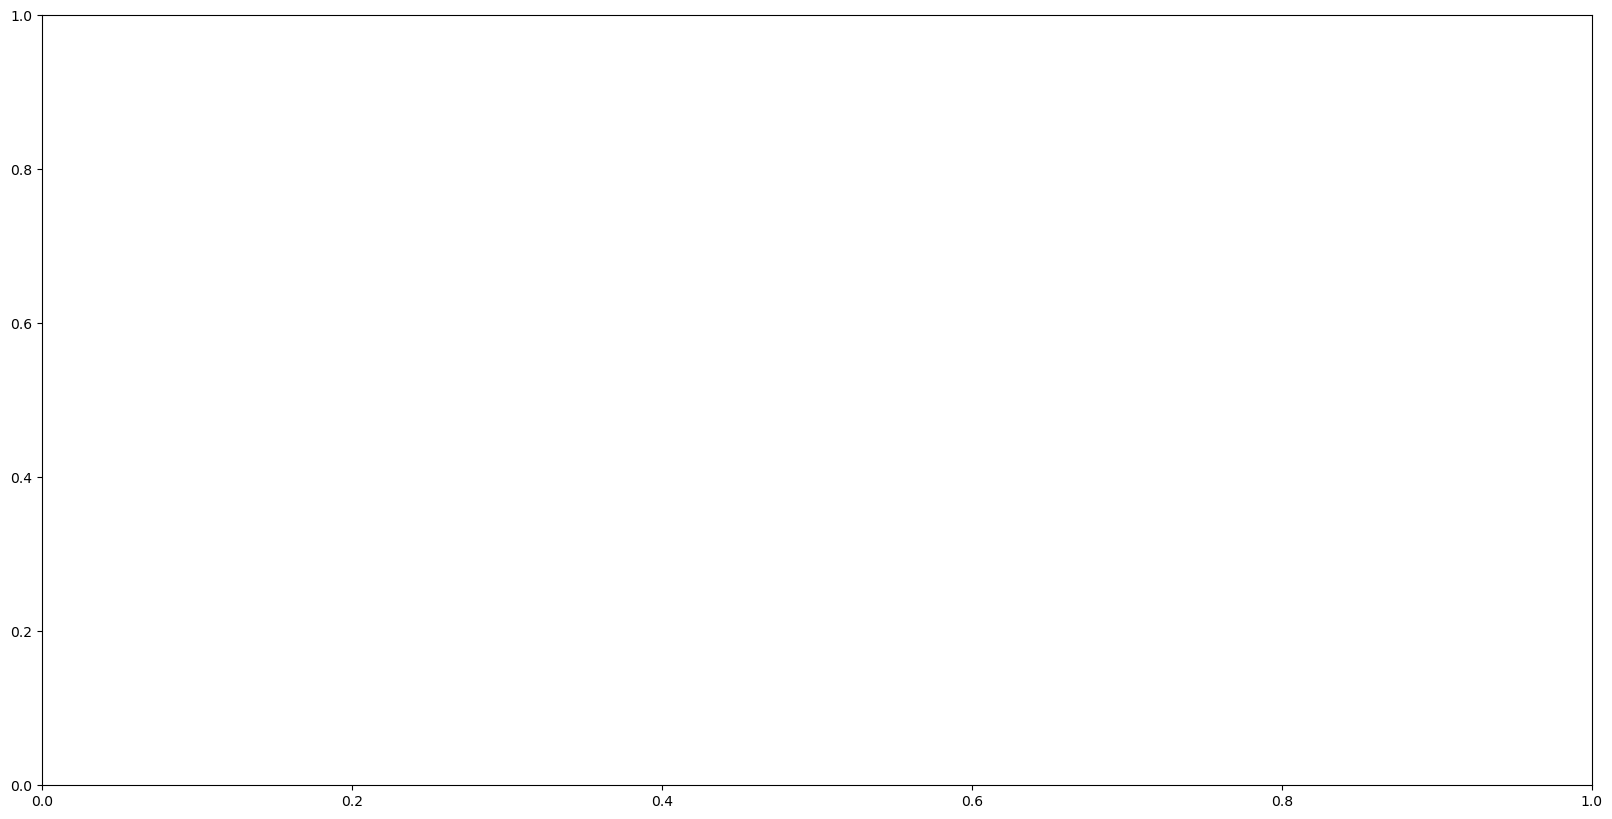

In [109]:
fig, ax = plt.subplots(figsize = (20,10))
f = data[["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]]
plt.show()

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   city                      914 non-null    object 
 1   age_first_funding_year    914 non-null    float64
 2   age_last_funding_year     914 non-null    float64
 3   age_first_milestone_year  914 non-null    float64
 4   age_last_milestone_year   914 non-null    float64
 5   relationships             914 non-null    int64  
 6   funding_rounds            914 non-null    int64  
 7   funding_total_usd         914 non-null    int64  
 8   milestones                914 non-null    int64  
 9   has_VC                    914 non-null    object 
 10  has_angel                 914 non-null    object 
 11  has_roundA                914 non-null    object 
 12  has_roundB                914 non-null    object 
 13  has_roundC                914 non-null    object 
 14  has_roundD

In [111]:
data.head()

,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,State,category,founded_year
0,San Diego,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0,1,0,0,0,0,1.0000,0,1,CA,other,2007
1,Los Gatos,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,1,1,1,4.7500,1,1,CA,enterprise,2000
2,San Diego,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0,0,1,0,0,0,4.0000,1,1,CA,web,2009
3,Cupertino,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0,0,0,1,1,1,3.3333,1,1,CA,software,2002
4,San Francisco,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,1,0,0,0,0,1.0000,1,0,CA,games_video,2010


Heqim kolonat qe jane te parendsishme per analizen:
* **Unnamed: 0 , Unnamed: 6** - Nuk kemi kuptimin e ketyre variablave
* **lattitude, longitude** - Vendodhja percaktohet nga qyteti dhe shteti
* **id, name, object_id, zip_code** - Variabla unike
* **state_code.1, labels** - Kolona eshte e replikuar
* **is_CA, is_NY, is_MA, is_TX, is_otherstate, is_software, is_web, is_mobile, is_enterprise, is_advertising, is_gamesvideo, is_ecommerce, is_biotech, is_consulting, is_othercategory** - Kategori te nje kolone tjeter
* **category_code, state_code** - Krijuam nje kolon me me pak kategori
* **Closed_at, age_first_funding_year, age_last_funding_year** - Informacioni eshte ne nje kolon tjeter 
* **Founded_at** - Krijuam nje kolon tjeter

### Visualization

#### Categorical Variables - Summary

In [112]:
data.describe(include = ['object'])

,city,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_top500,status,State,category,founded_year
count,914,914,914,914,914,914,914,914,914,914,914,914
unique,220,2,2,2,2,2,2,2,2,6,11,23
top,San Francisco,0,0,1,0,0,0,1,1,CA,other,2006
freq,125,616,682,464,555,701,823,739,588,482,228,104


#### State vs. Status

/var/folders/tx/sgs95lf56d7_f3tfhblvvw640000gn/T/ipykernel_83167/3995927891.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['proportions'] = prop_df.groupby('State')['count'].apply(lambda x: x/x.sum())


Text(0.5, 1.0, 'State vs. Status')

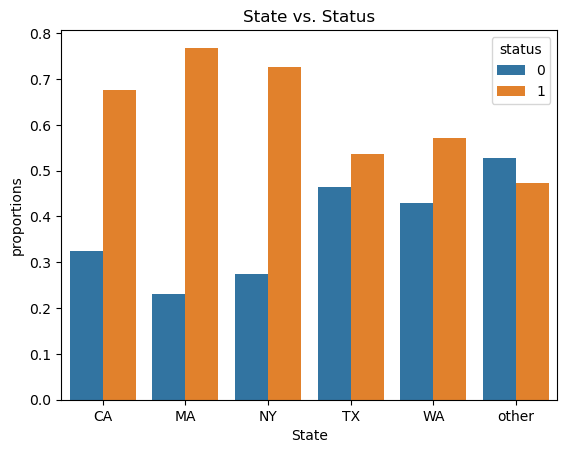

In [113]:
prop_df = data.groupby(['State','status'],group_keys = True).size().reset_index(name='count')
prop_df['proportions'] = prop_df.groupby('State')['count'].apply(lambda x: x/x.sum())
sns.barplot(data = prop_df, x = 'State', y = 'proportions',hue = 'status')
plt.title('State vs. Status')

#### State vs. Category

In [114]:
cat_state = pd.crosstab(index = data['State'], columns = data['category'])

In [115]:
cat_state

category,advertising,biotech,enterprise,games_video,hardware,mobile,network_hosting,other,semiconductor,software,web
State,,,,,,,,,,,
CA,31,20,35,32,21,39,15,114,23,73,79
MA,6,5,5,0,2,10,3,15,2,24,10
NY,12,1,5,14,1,9,1,35,0,7,21
TX,0,0,5,1,1,2,2,13,4,8,5
WA,1,0,5,2,1,5,5,9,0,7,7
other,10,7,17,3,1,14,7,42,6,33,21


#### Category vs. Status

/var/folders/tx/sgs95lf56d7_f3tfhblvvw640000gn/T/ipykernel_83167/579220499.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prop_df['proportions'] = prop_df.groupby('category')['counts'].apply(lambda x: x/float(x.sum()))


<Axes: xlabel='category', ylabel='proportions'>

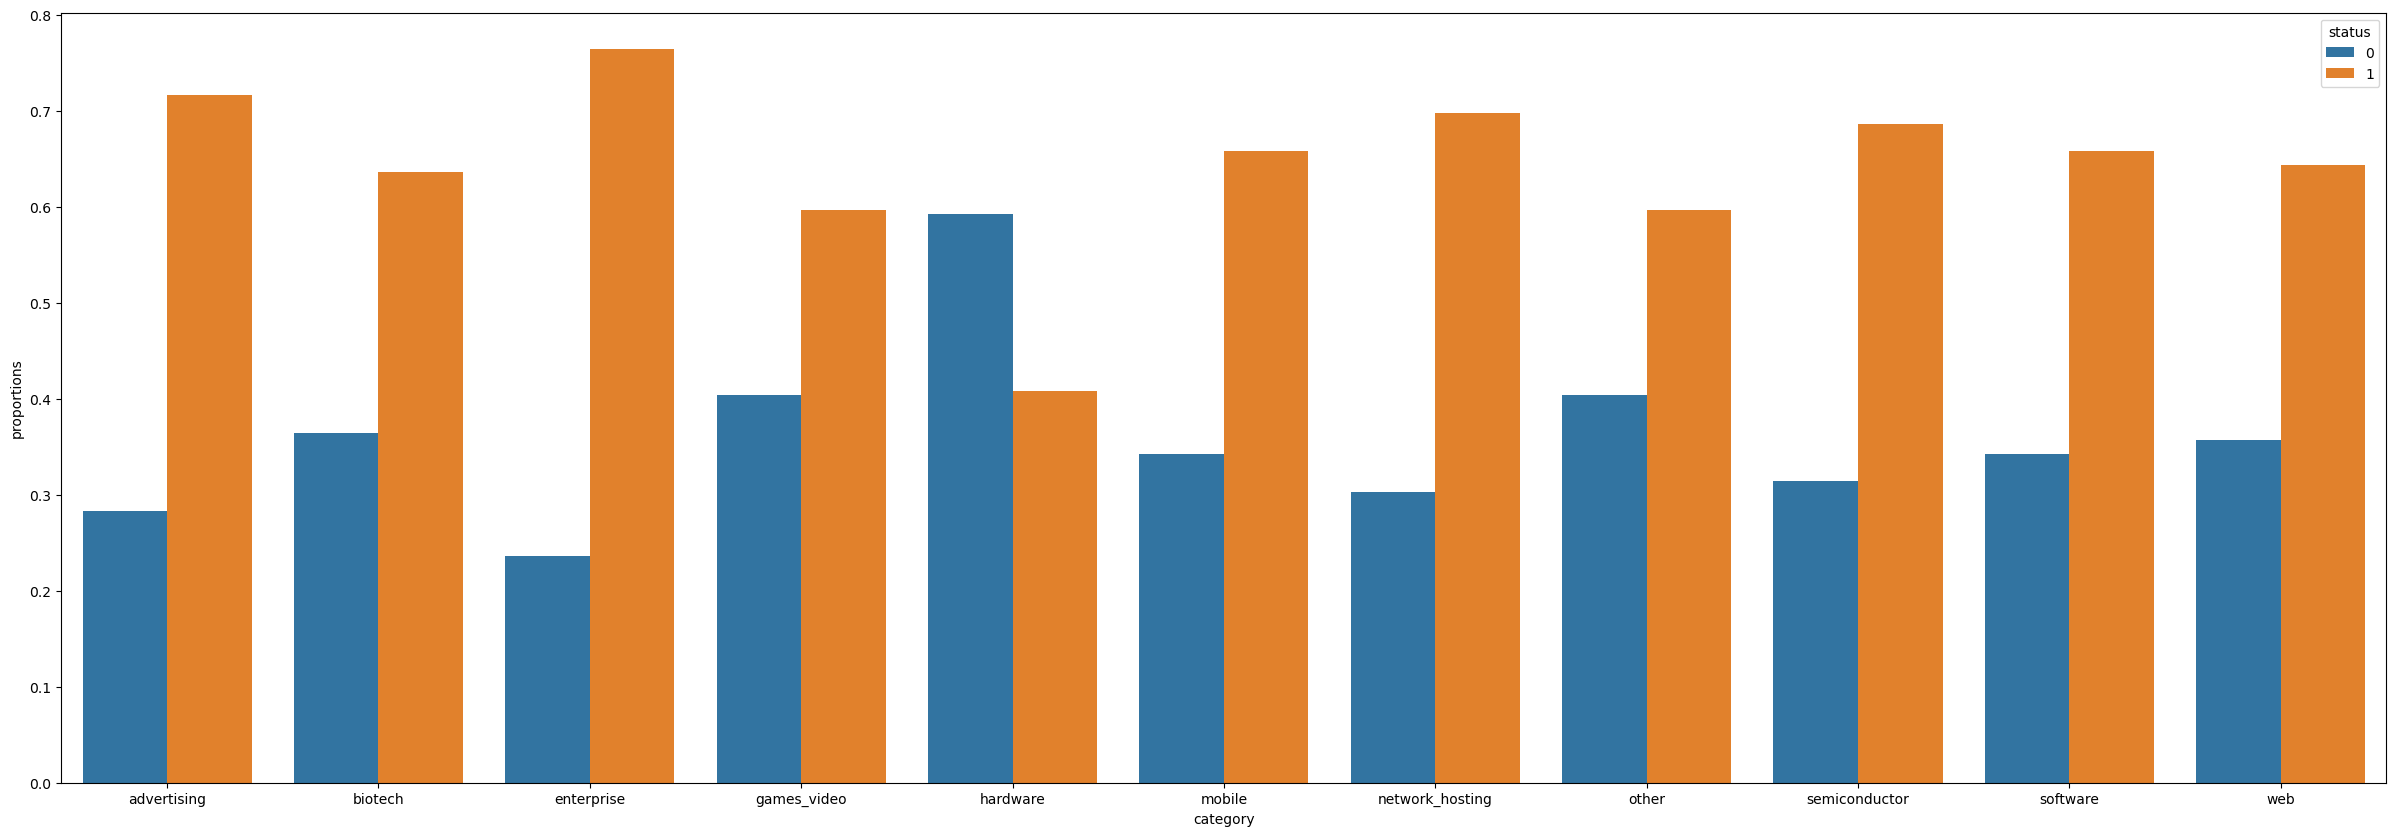

In [116]:
fig, ax = plt.subplots(figsize = (30,10))
prop_df = data.groupby(['category','status']).size().reset_index(name='counts')
prop_df['proportions'] = prop_df.groupby('category')['counts'].apply(lambda x: x/float(x.sum()))
sns.barplot(data = prop_df, x = 'category', y = 'proportions',hue = 'status')

#### Category vs Founded year

In [117]:
cat_year = pd.crosstab(index = data['founded_year'], columns = data['category'])

Text(0.5, 1.0, 'Category wise evolution of startups')

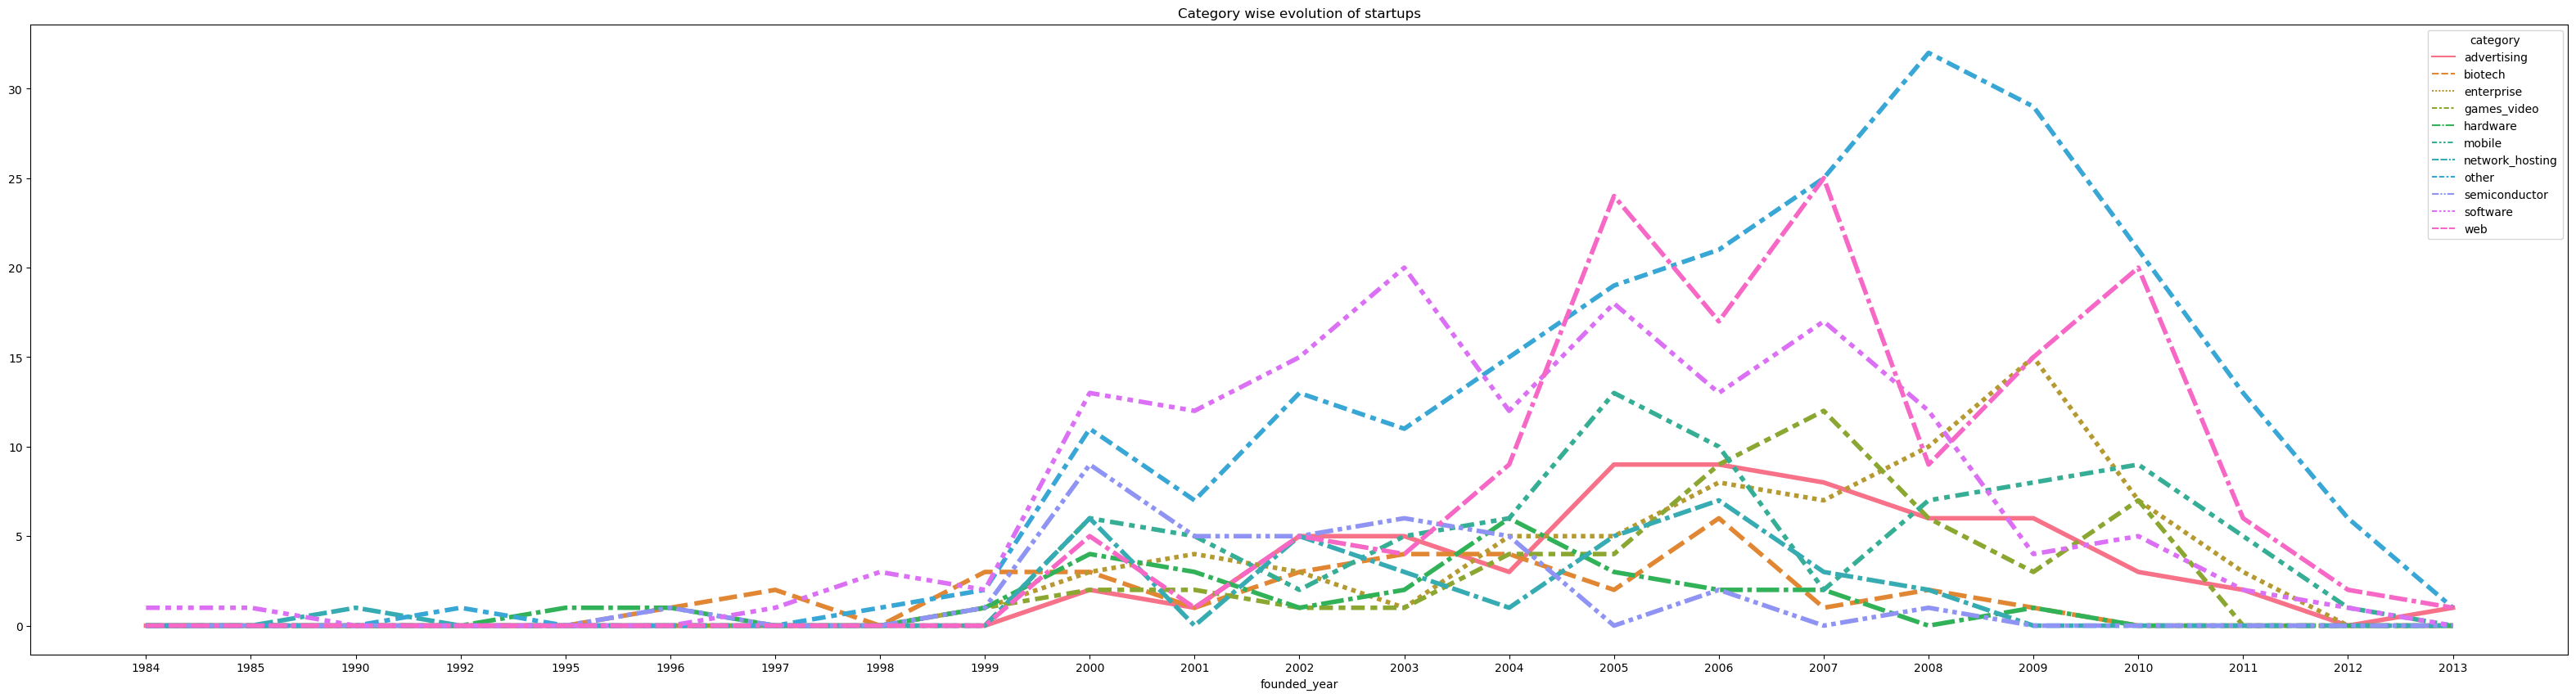

In [118]:
fig, ax = plt.subplots(figsize=(40,10))
sns.lineplot(data = cat_year, lw = 4)
plt.title('Category wise evolution of startups')

#### Founded year vs. Total funding

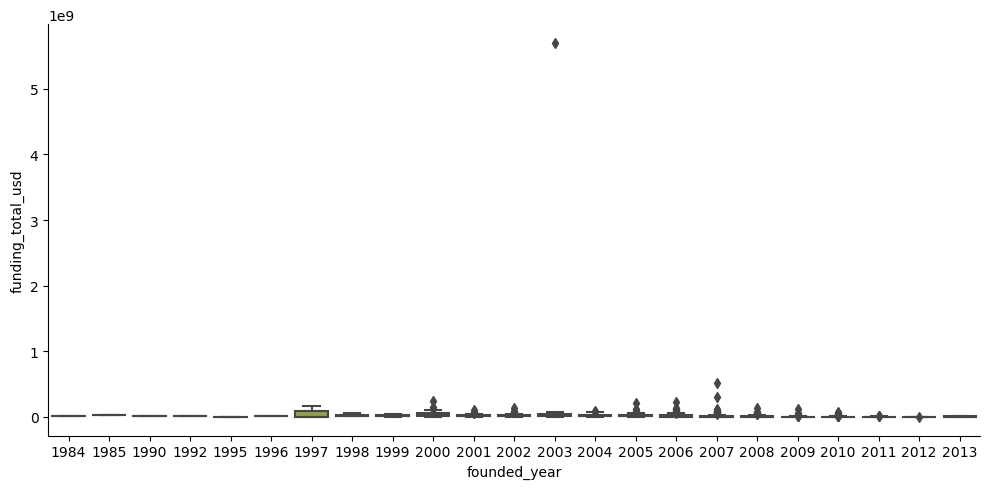

In [119]:
sns.catplot(data=data, x="founded_year", y="funding_total_usd", kind="box",height=5, aspect=2,order = ['1984','1985','1990','1992','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013'])

#### Has_VC, Has_angel, Has_roundA, Has_roundB, Has_roundC, Has_roundD

<Axes: xlabel='variable', ylabel='count'>

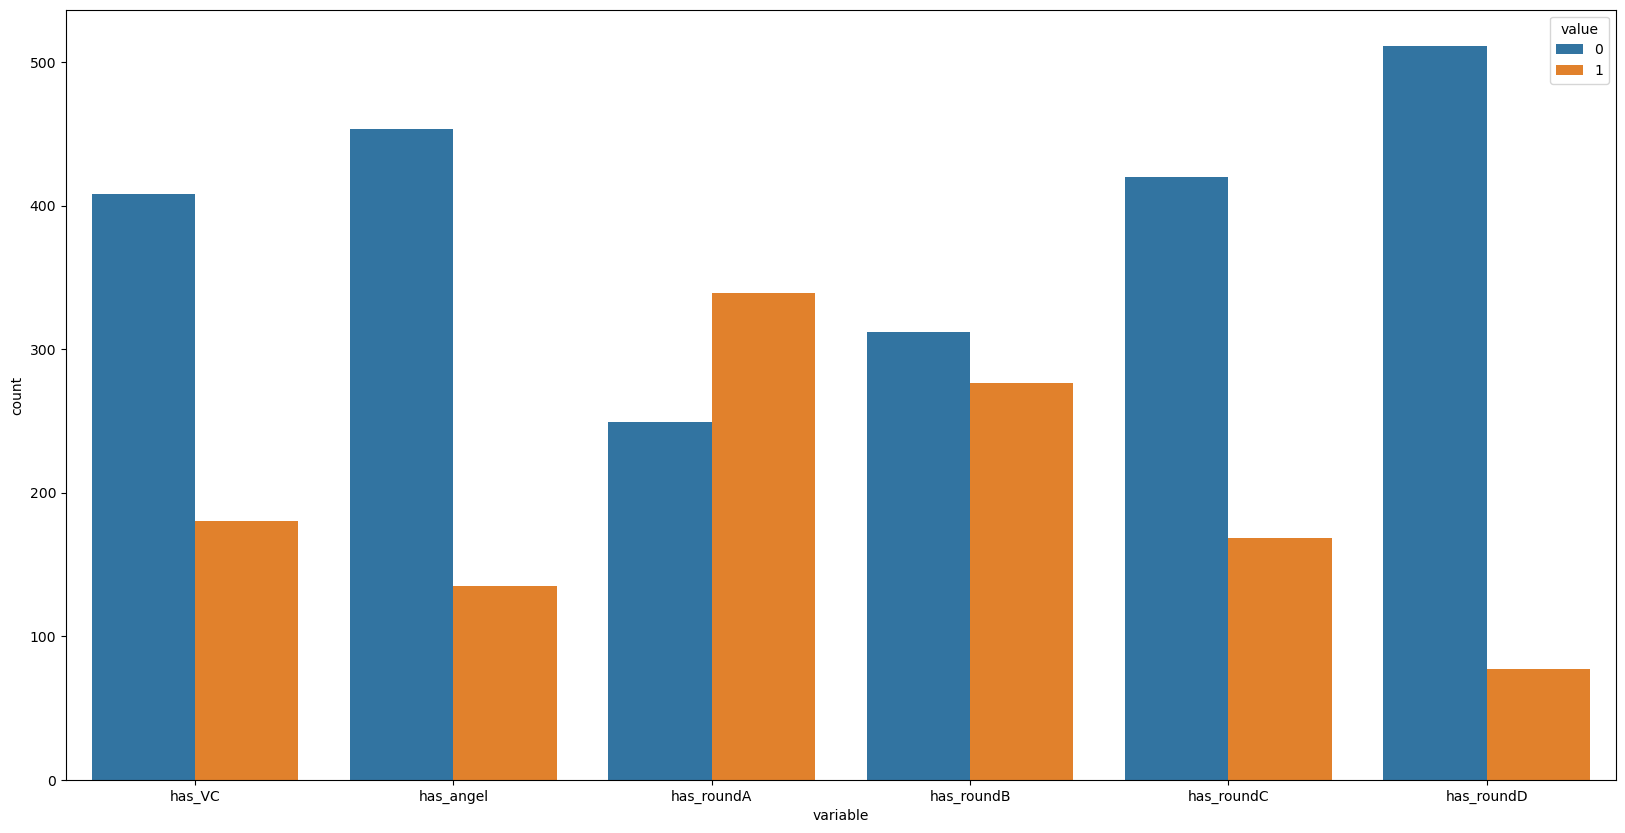

In [120]:
fig, ax = plt.subplots(figsize = (20,10))
d = data.loc[data['status'] == '1']
f = d[["has_VC","has_angel","has_roundA","has_roundB","has_roundC","has_roundD"]]
sns.countplot(data = pd.melt(f), x = 'variable', hue = 'value')

#### Quantitative Variables summary

In [121]:
data.describe(include = ['float64','int64'])

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants
count,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,9.140000e+02,914.000000,914.000000
mean,2.270677,3.947489,2.613675,3.985237,7.680525,2.312910,2.552193e+07,1.836980,2.844838
std,2.457724,2.930272,2.816996,3.382481,7.265480,1.394131,1.905590e+08,1.323273,1.880201
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,1.000000
25%,0.568475,1.669175,0.000000,1.000000,3.000000,1.000000,2.712500e+06,1.000000,1.500000
50%,1.449350,3.545200,2.000000,3.754800,5.000000,2.000000,1.000000e+07,2.000000,2.500000
75%,3.578075,5.558900,4.002700,6.026050,10.000000,3.000000,2.465264e+07,3.000000,3.950000
max,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,16.000000


#### Correlation plot

<Axes: >

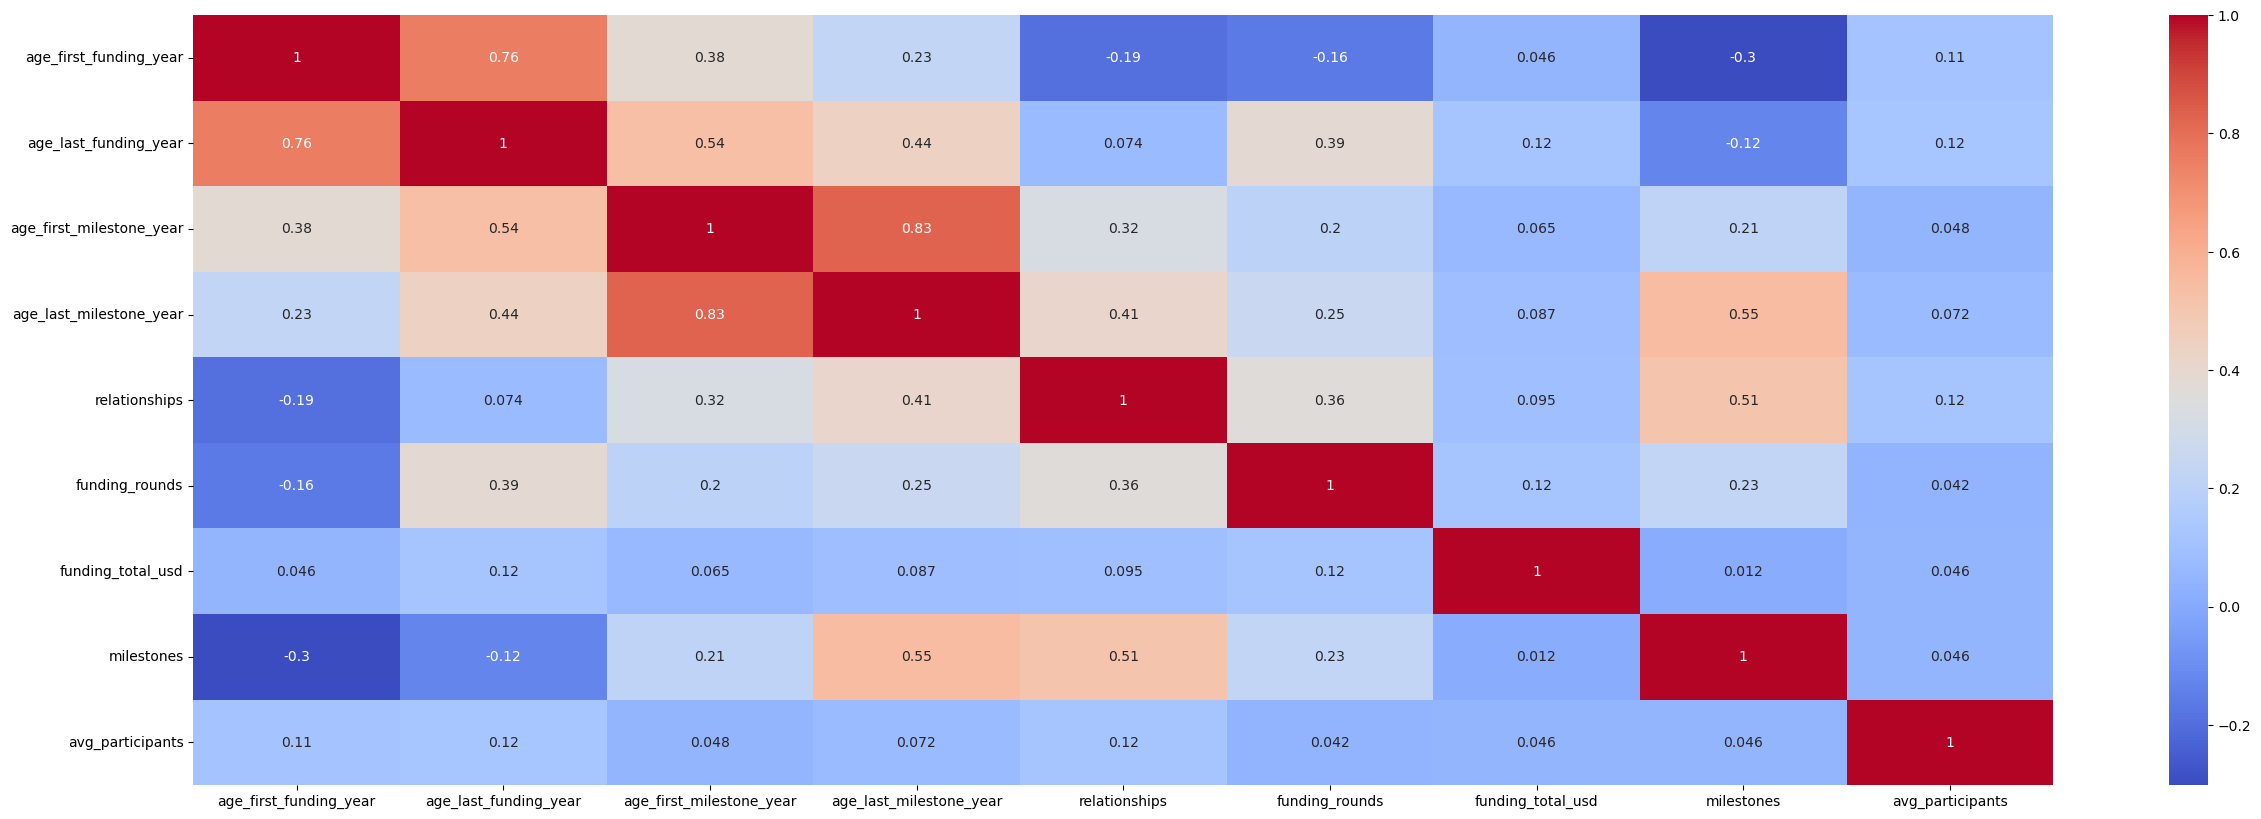

In [122]:
fig, ax = plt.subplots(figsize = (30,10))
corr = data.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

### Models

In [123]:
y = data['status']
x = data.drop('status', axis = 1)

In [124]:
x = pd.get_dummies(x, drop_first = True)

In [125]:
#split train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state = 0)

### Suport Vector Machine

In [126]:
from sklearn.svm import SVC

In [127]:
model_2 = SVC()

In [128]:
model_2.fit(x_train, y_train)

SVC()

In [129]:
from sklearn.metrics import confusion_matrix, classification_report

In [130]:
predictions_2 = model_2.predict(x_test)

In [131]:
predictions_2

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

In [132]:
print(confusion_matrix(y_test, predictions_2))

[[  0  90]
 [  0 185]]


In [133]:
print(classification_report(y_test, predictions_2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.67      1.00      0.80       185

    accuracy                           0.67       275
   macro avg       0.34      0.50      0.40       275
weighted avg       0.45      0.67      0.54       275



/Users/crs/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/crs/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/crs/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
param_grid2= {'C': [1, 10, 100, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001]}

In [135]:
grid = GridSearchCV(SVC(), param_grid2, verbose=3, refit=True)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=1, gamma=0.1;, score=0.672 total time=   0.1s
[CV 2/5] END ....................C=1, gamma=0.1;, score=0.656 total time=   0.1s
[CV 3/5] END ....................C=1, gamma=0.1;, score=0.633 total time=   0.1s
[CV 4/5] END ....................C=1, gamma=0.1;, score=0.641 total time=   0.1s
[CV 5/5] END ....................C=1, gamma=0.1;, score=0.638 total time=   0.1s
[CV 1/5] END ...................C=1, gamma=0.01;, score=0.711 total time=   0.1s
[CV 2/5] END ...................C=1, gamma=0.01;, score=0.672 total time=   0.1s
[CV 3/5] END ...................C=1, gamma=0.01;, score=0.664 total time=   0.1s
[CV 4/5] END ...................C=1, gamma=0.01;, score=0.664 total time=   0.1s
[CV 5/5] END ...................C=1, gamma=0.01;, score=0.606 total time=   0.1s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.641 total time=   0.1s
[CV 2/5] END ..................C=1, gamma=0.001;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [136]:
grid_predictions = grid.predict(x_test)

In [137]:
print(confusion_matrix(y_test, grid_predictions))

[[ 25  65]
 [ 13 172]]


In [138]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.66      0.28      0.39        90
           1       0.73      0.93      0.82       185

    accuracy                           0.72       275
   macro avg       0.69      0.60      0.60       275
weighted avg       0.70      0.72      0.68       275

